<a href="https://colab.research.google.com/github/BrockH3/ML_Project/blob/main/ML_project_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import torch
import torch.nn as nn

from sklearn.preprocessing import MinMaxScaler
from datetime import date, timedelta, datetime
import matplotlib.dates as mdates
import math

In [35]:
#symbol and time period
symbol = 'ETH-USD'
start_date = '2022-01-01'
end_date = '2023-01-01'

#Download
eth_data = yf.download(symbol, start=start_date, end=end_date)

#Feature selection
features = ['Open', 'High', 'Low', 'Volume']
X = eth_data[features]
y = eth_data['Close']

#Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(np.array(y).reshape(-1, 1))

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


[*********************100%%**********************]  1 of 1 completed


In [36]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

In [69]:
#sequential model, 5 to 32 to 64 to 16 to 8 to 1
seq_model = nn.Sequential(nn.Linear(4,128),
                        nn.ReLU(),
                        nn.Linear(128,64),
                        nn.ReLU(),
                        nn.Linear(64,32),
                        nn.ReLU(),
                        nn.Linear(32,16),
                        nn.ReLU(),
                        nn.Linear(16,8),
                        nn.ReLU(),
                        nn.Linear(8,4),
                        nn.ReLU(),
                        nn.Linear(4,1),
                        nn.ReLU()
                        )

In [87]:
#model training for 100 epochs

import torch.optim as optim
optimizer = optim.Adam(seq_model.parameters(),lr =0.001)
epochs = 200
MSE = nn.MSELoss()
train_l = []
val_l = []

for epoch in range(1, epochs + 1):
      Y_train_pred = seq_model(X_train)
      train_loss = MSE(Y_train_pred, y_train)
      train_l.append(train_loss.detach().numpy())

      y_val_pred = seq_model(X_test)
      val_loss = MSE(y_val_pred, y_test)
      val_l.append(val_loss.detach().numpy())

      optimizer.zero_grad()
      train_loss.backward()
      optimizer.step()

      with torch.no_grad():
          y_train_pred = seq_model(X_train)
          train_RMSE = np.sqrt(MSE(Y_train_pred, y_train)).detach().numpy()

          y_val_pred = seq_model(X_test)
          val_RMSE = np.sqrt(MSE(y_val_pred, y_test)).detach().numpy()

      if(epoch%50 == 0):
        print('Train loss: ', train_loss.detach().numpy(),'Val loss: ', val_loss.detach().numpy(),'Train RMSE: ', train_RMSE,'val RMSE: ', val_RMSE)

Train loss:  0.00012170564 Val loss:  0.00039171719 Train RMSE:  0.011032028 val RMSE:  0.020071285
Train loss:  9.177871e-05 Val loss:  0.0003259786 Train RMSE:  0.00958012 val RMSE:  0.01798698
Train loss:  8.935314e-05 Val loss:  0.00032804158 Train RMSE:  0.009452679 val RMSE:  0.01811937
Train loss:  8.8869056e-05 Val loss:  0.00032690272 Train RMSE:  0.009427039 val RMSE:  0.018084042
[array(0.00032959, dtype=float32), array(0.0062598, dtype=float32), array(0.00051536, dtype=float32), array(0.00237853, dtype=float32), array(0.0048026, dtype=float32), array(0.00364882, dtype=float32), array(0.00137357, dtype=float32), array(0.00032956, dtype=float32), array(0.0009286, dtype=float32), array(0.00174503, dtype=float32), array(0.00165676, dtype=float32), array(0.00090852, dtype=float32), array(0.00035254, dtype=float32), array(0.00050001, dtype=float32), array(0.00112512, dtype=float32), array(0.00156358, dtype=float32), array(0.00144172, dtype=float32), array(0.00091851, dtype=float3

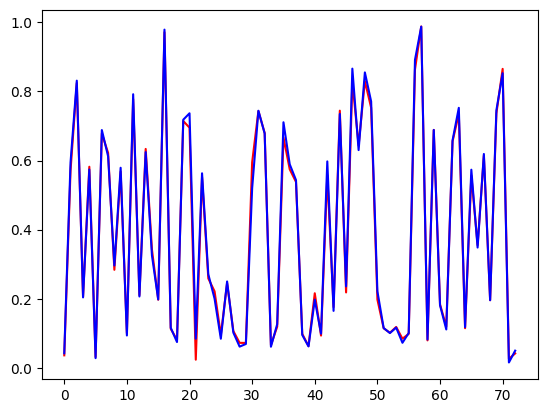

In [88]:
plt.plot(y_val_pred, 'r')
plt.plot(y_test, 'b')


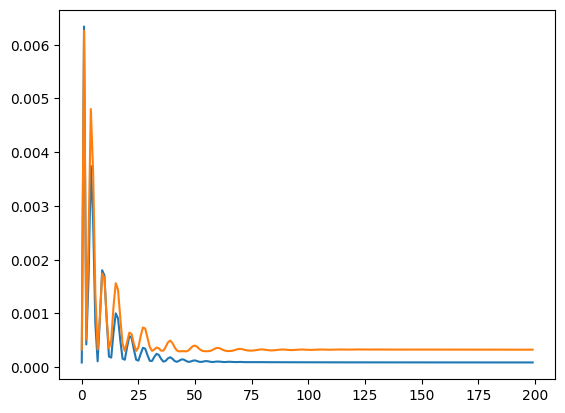

In [89]:
plt.plot(train_l)
plt.plot(val_l)